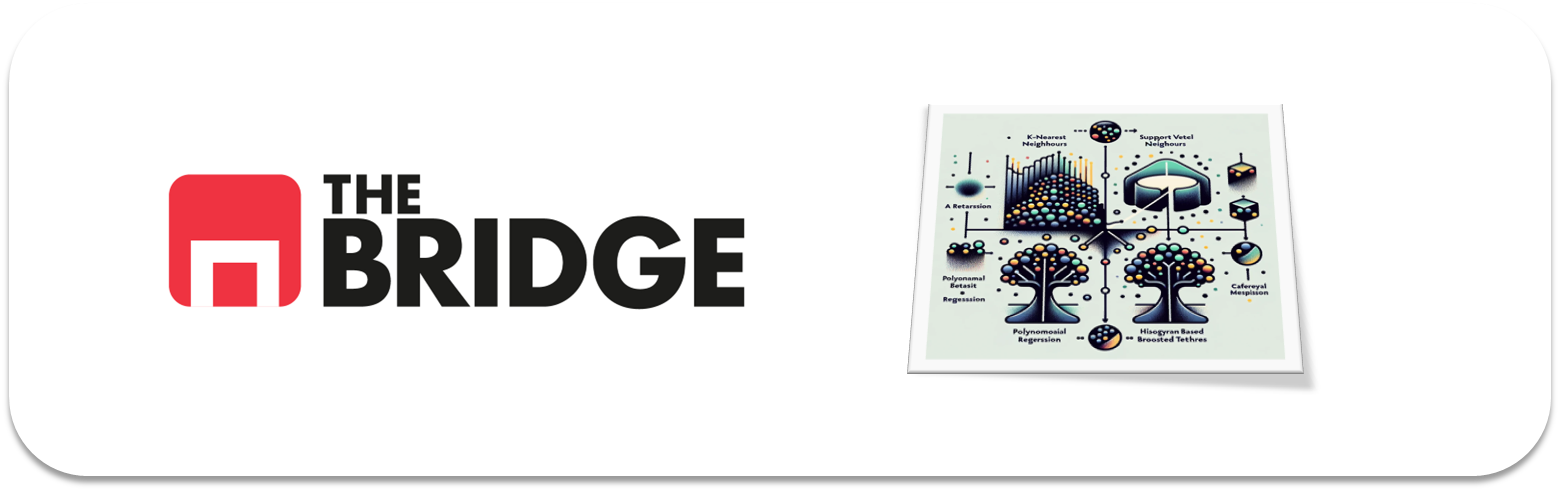

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [31]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [39]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

He buscado información sobre la descripción en Internet:

<table>
<thead><tr><th>Variable Name</th><th>Description</th><th>Data Type</th></tr></thead><tbody>
 <tr><td>SeriousDlqin2yrs</td><td>Customer hasn’t paid the loan within 90 days.</td><td>Y/N</td></tr>
 <tr><td>RevolvingUtilizationOfUnsecuredLines</td><td>Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.</td><td>percentage</td></tr>
 <tr><td>Age</td><td>Age of borrower in years.</td><td>integer</td></tr>
 <tr><td>NumberOfTime30-59DaysPastDueNotWorse</td><td>Number of times borrower has been 30-59 days past due but no worse in the last 2 years.</td><td>integer</td></tr>
 <tr><td>DebtRatio</td><td>Monthly debt payments, alimony,living costs divided by monthy gross income.</td><td>percentage</td></tr>
 <tr><td>MonthlyIncome</td><td>Monthly income.</td><td>real</td></tr>
 <tr><td>NumberOfOpenCreditLinesAndLoans</td><td>Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).</td><td>integer</td></tr>
 <tr><td>NumberOfTimes90DaysLate</td><td>Number of times borrower has been 90 days or more past due.</td><td>integer</td></tr>
 <tr><td>NumberRealEstateLoansOrLines</td><td>Number of mortgage and real estate loans including home equity lines of credit.</td><td>integer</td></tr>
 <tr><td>NumberOfTime60-89DaysPastDueNotWorse</td><td>Number of times borrower has been 60-89 days past due but no worse in the last 2 years.</td><td>integer</td></tr>
 <tr><td>NumberOfDependents</td><td>Number of dependents in family excluding themselves (spouse, children etc.).</td><td>integer</td></tr>
</tbody></table>

In [41]:

for col in df.columns:
    print(f"Para {col}, unkowns o missings:", end = " ")
    try:
        missings = df[col].value_counts()["unknown"]
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
    except:
        print(0)

Para SeriousDlqin2yrs, unkowns o missings: 0
Para RevolvingUtilizationOfUnsecuredLines, unkowns o missings: 0
Para age, unkowns o missings: 0
Para NumberOfTime30-59DaysPastDueNotWorse, unkowns o missings: 0
Para DebtRatio, unkowns o missings: 0
Para MonthlyIncome, unkowns o missings: 0
Para NumberOfOpenCreditLinesAndLoans, unkowns o missings: 0
Para NumberOfTimes90DaysLate, unkowns o missings: 0
Para NumberRealEstateLoansOrLines, unkowns o missings: 0
Para NumberOfTime60-89DaysPastDueNotWorse, unkowns o missings: 0
Para NumberOfDependents, unkowns o missings: 0


Uso funciones generadas para el TOOLBOX de mi grupo de Team Challenge.

In [43]:
def funcion_describe(df):

    resultado = pd.DataFrame()
    """
    Obtiene información sobre porcentaje de cardinalidad, el tipo de datos, los valores únicos y el porcentaje de valores NaN en cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """
    for col in df.columns:
        datos = {}
        datos['%_cardinalidad'] = round(df[col].nunique() / len(df) * 100, 2)
        datos['Tipo_dato'] = df[col].dtype
        datos['valores_unicos'] = df[col].nunique()
        datos['%_NaN'] = round(df[col].isna().mean() * 100, 2)
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [5]:
funcion_describe(df)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
SeriousDlqin2yrs,0.02,int64,2,0.0
RevolvingUtilizationOfUnsecuredLines,85.86,float64,10764,0.0
age,0.62,int64,78,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.08,int64,10,0.0
DebtRatio,92.1,float64,11547,0.0
MonthlyIncome,33.24,float64,4167,5.75
NumberOfOpenCreditLinesAndLoans,0.34,int64,43,0.0
NumberOfTimes90DaysLate,0.1,int64,13,0.0
NumberRealEstateLoansOrLines,0.13,int64,16,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.06,int64,8,0.0


In [ ]:
df = df.drop('MonthlyIncome', axis=1)

In [55]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True)

In [56]:
def funcion_categorias(df):
    
    """
    Obtiene información sobre el tipo de categoria de cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['Categoria'] = 'Numerica Continua' if df[col].nunique() > 10 else 'Numérica Discreta'
        else:
            datos['Categoria'] = 'Categórica' if df[col].nunique() > 2 else 'Binaria'
   
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [57]:
funcion_categorias(df)

,Categoria
SeriousDlqin2yrs,Numérica Discreta
RevolvingUtilizationOfUnsecuredLines,Numerica Continua
age,Numerica Continua
NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
DebtRatio,Numerica Continua
NumberOfOpenCreditLinesAndLoans,Numerica Continua
NumberOfTimes90DaysLate,Numerica Continua
NumberRealEstateLoansOrLines,Numerica Continua
NumberOfTime60-89DaysPastDueNotWorse,Numérica Discreta
NumberOfDependents,Numérica Discreta


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Es un problema se clasificacion en el que tendremos que saber si el individuo pagará o no.

La variable target sería  **SeriousDlqin2yrs**.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

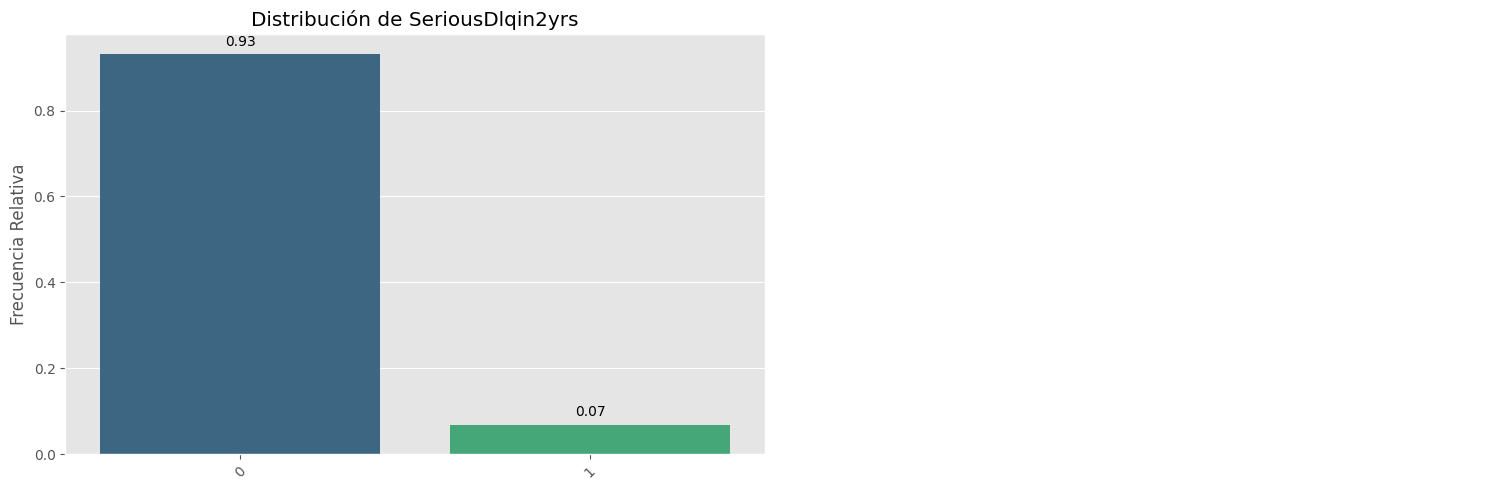

In [17]:
target = "SeriousDlqin2yrs"
bt.pinta_distribucion_categoricas(df, [target], relativa= True, mostrar_valores= True)

Esta totalmente desequilibrado.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [64]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
X_train = train_set.drop("SeriousDlqin2yrs", axis = 1)
X_test = test_set.drop("SeriousDlqin2yrs", axis = 1)
y_train = train_set["SeriousDlqin2yrs"]
y_test = test_set["SeriousDlqin2yrs"]

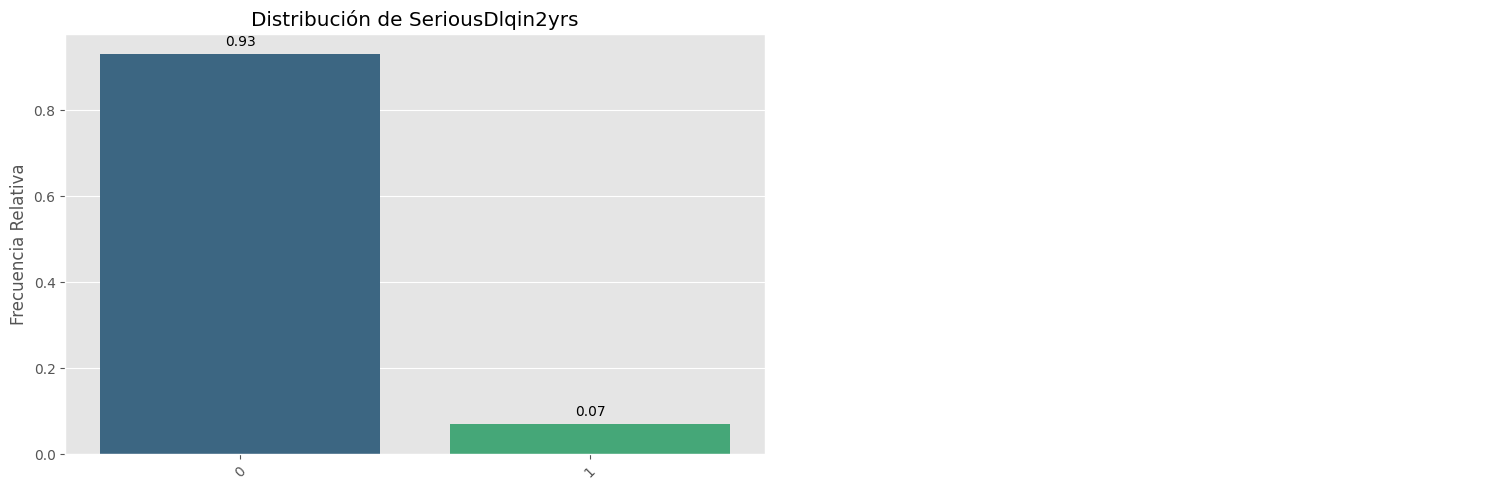

In [65]:
target = "SeriousDlqin2yrs"
bt.pinta_distribucion_categoricas(train_set, [target], relativa= True, mostrar_valores= True)

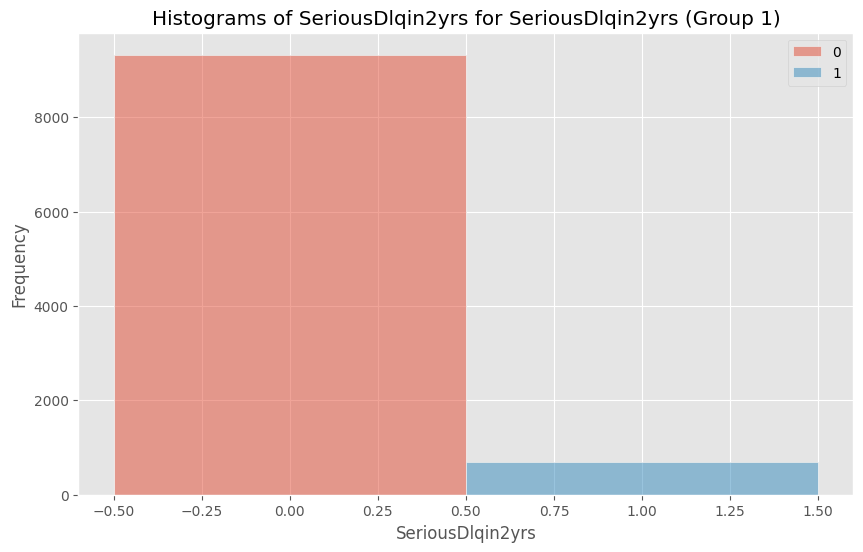

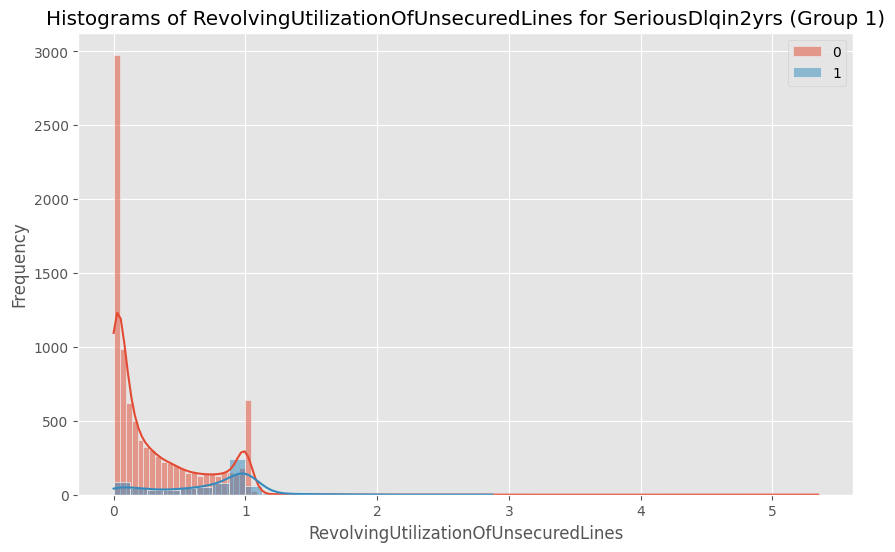

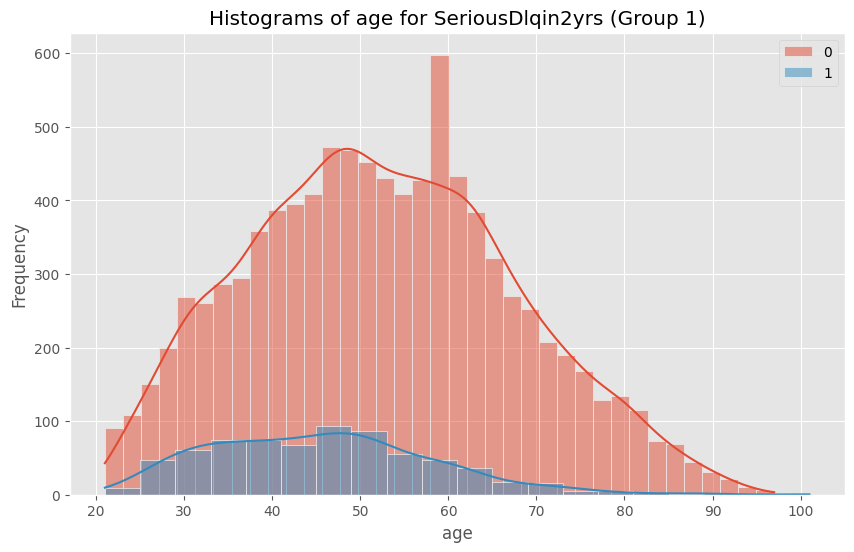

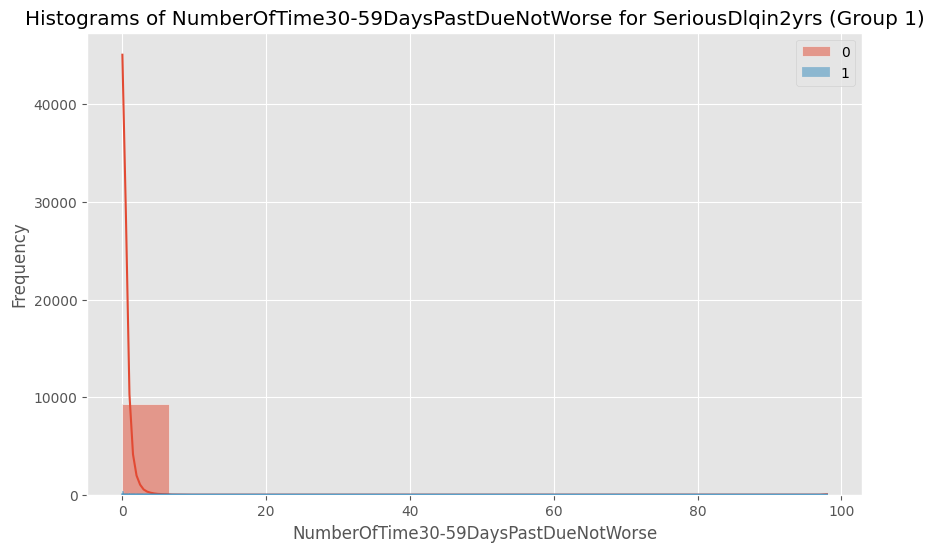

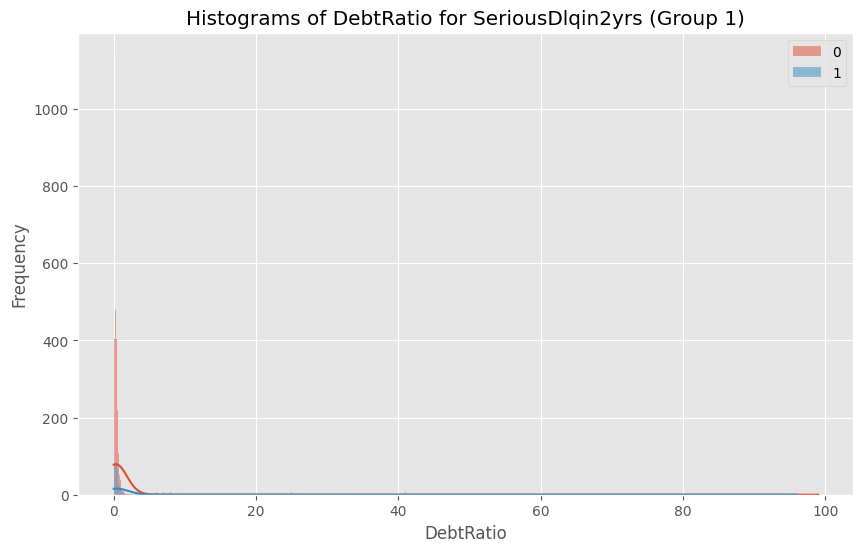

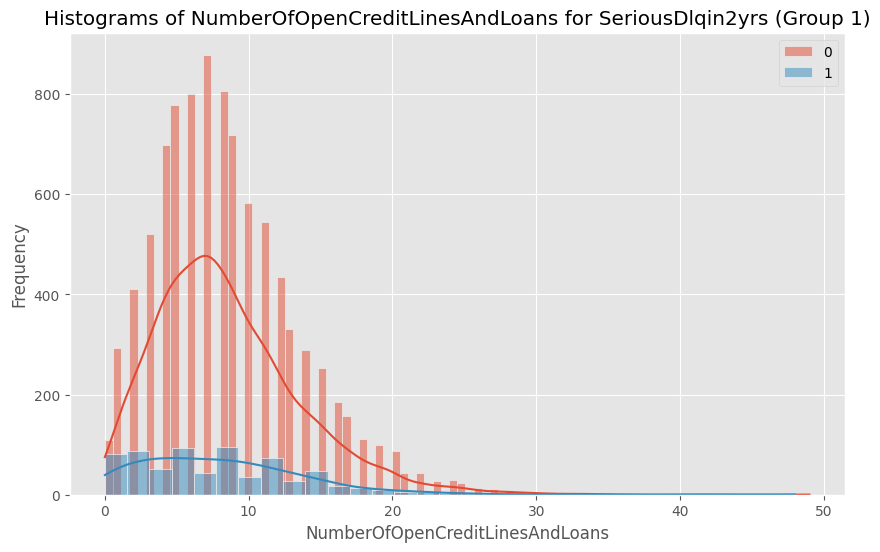

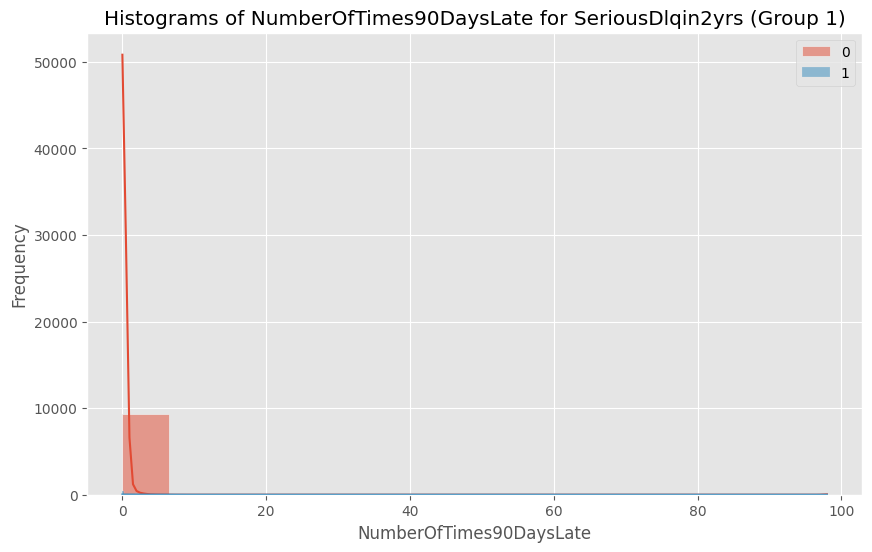

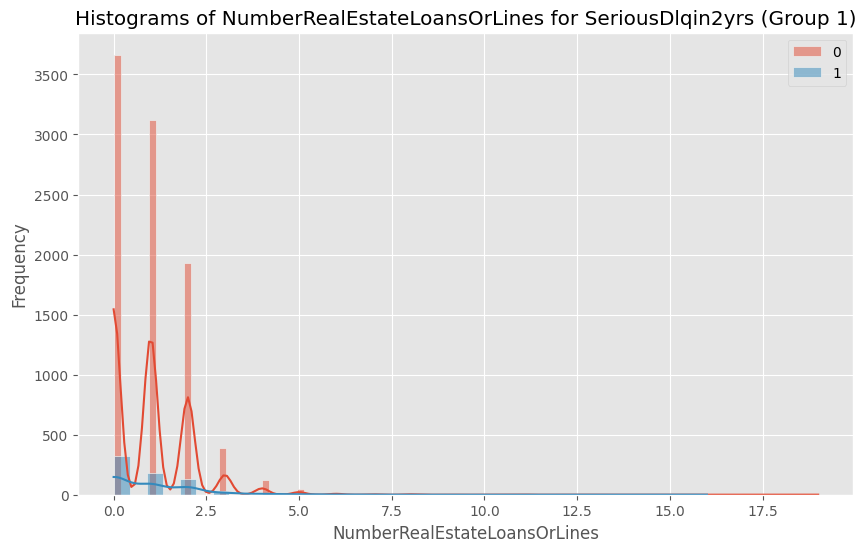

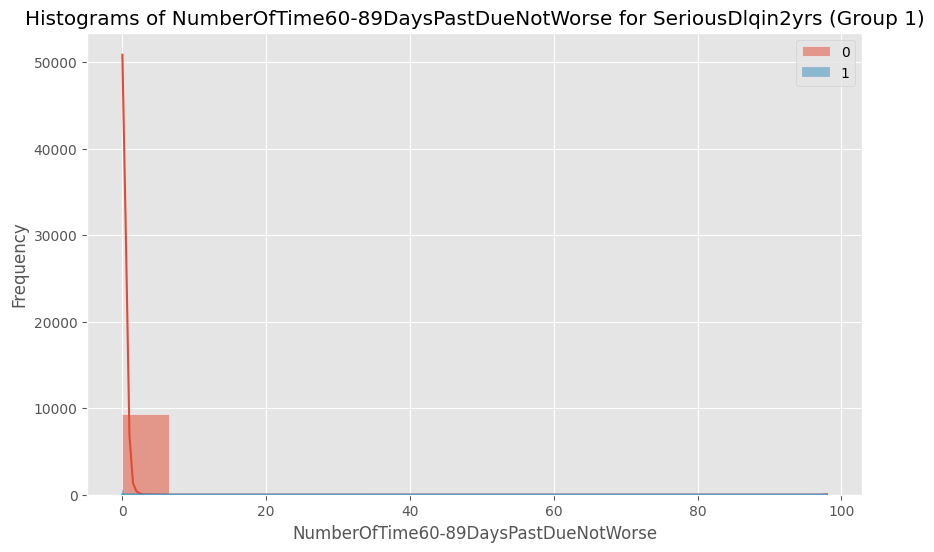

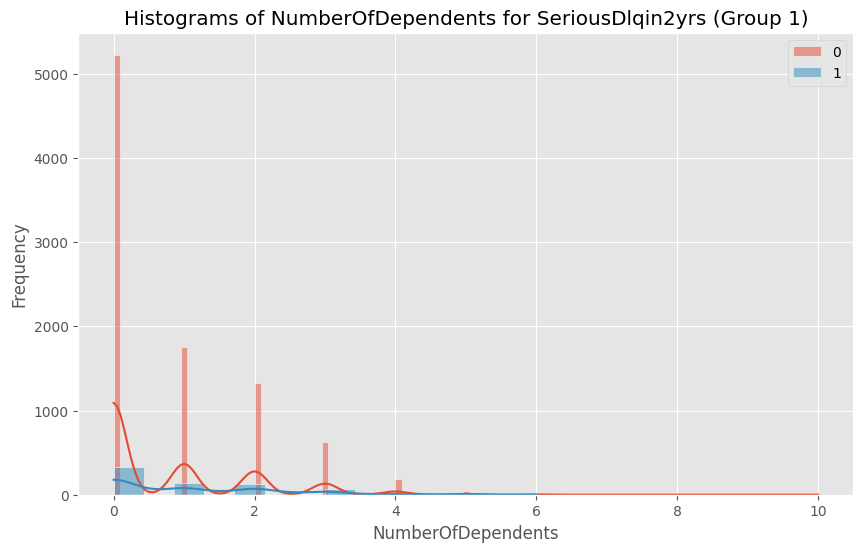

In [58]:
for col in train_set:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

array([[<Axes: title={'center': 'SeriousDlqin2yrs'}>,
        <Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>],
       [<Axes: title={'center': 'NumberOfTimes90DaysLate'}>,
        <Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>],
       [<Axes: title={'center': 'NumberOfDependents'}>, <Axes: >,
        <Axes: >]], dtype=object)

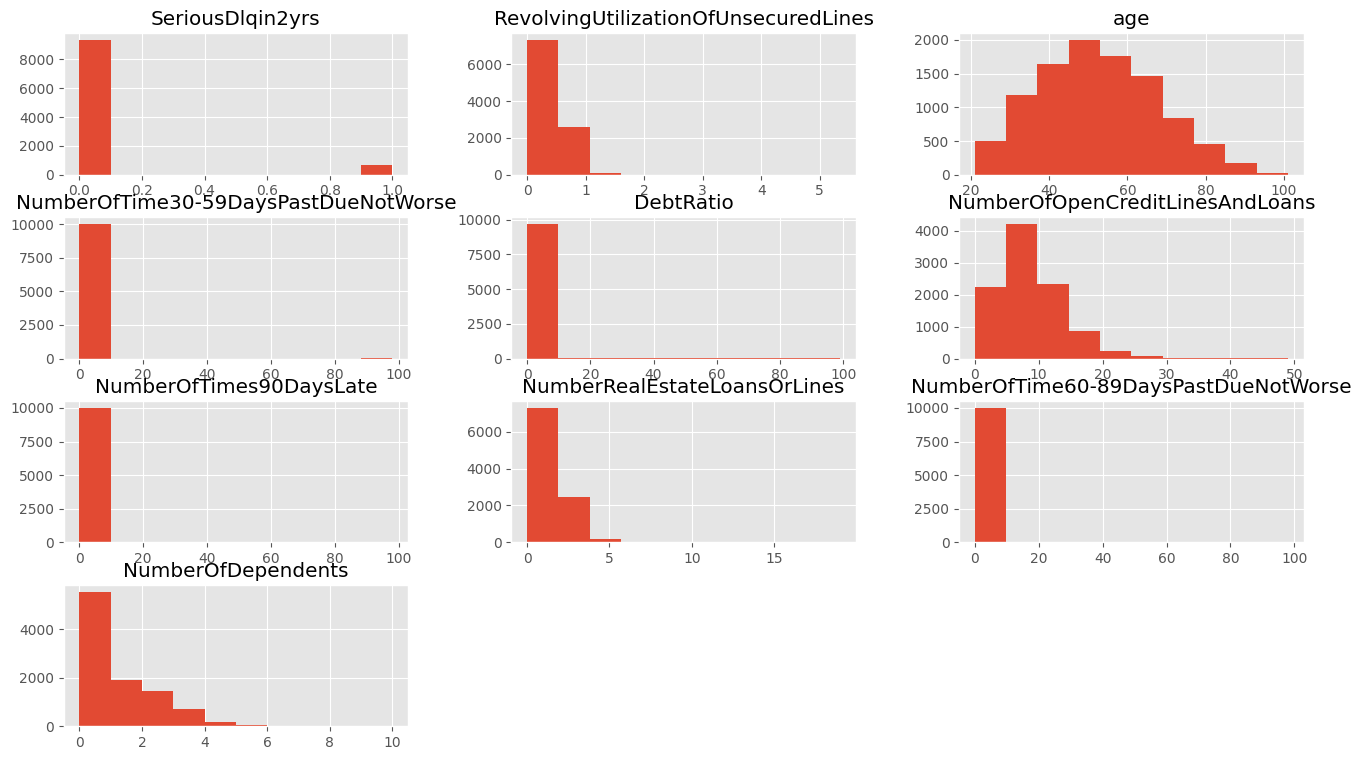

In [59]:
train_set.hist()

En principio no voy a quitar ninguno porque parece que todos nos pueden ayudar a rpedecir. NumberOfDependents podriamos hacerlo categorico pero lo voy a dejar asi porque tiene sentido que pueda ser numérico, cuantos mas dependientes menos probabilidades de que pague.

Hemos dicho que el modelo K-NN era muy sensible a escala asi que lo primero que voy a hacer es escalar los datos.

In [66]:
features_num = df.drop('SeriousDlqin2yrs', axis=1)
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)
train_set[features_num] = train_set_scaled
test_set[features_num] = test_set_scaled

TypeError: Must pass DataFrame or 2-d ndarray with boolean values only

In [67]:
funcion_describe(X_train)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
RevolvingUtilizationOfUnsecuredLines,85.91,float64,8616,0.0
age,0.78,int64,78,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.1,int64,10,0.0
DebtRatio,92.51,float64,9278,0.0
NumberOfOpenCreditLinesAndLoans,0.41,int64,41,0.0
NumberOfTimes90DaysLate,0.13,int64,13,0.0
NumberRealEstateLoansOrLines,0.16,int64,16,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.08,int64,8,0.0
NumberOfDependents,0.1,float64,10,0.0


Me falla por alguna razon que no entiendo bien.

Ahora voy a equilibrar el train, dado que el target esta desequilibrado.

Primero voy a ver con un modelo que tipo de balanceado es mejor y luego tras aplicarlo hago el resto de modelos:

In [68]:
rf_clf = RandomForestClassifier(max_depth= 5, random_state= 42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [69]:
print(classification_report(y_train,rf_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9328
           1       0.90      0.16      0.27       701

    accuracy                           0.94     10029
   macro avg       0.92      0.58      0.62     10029
weighted avg       0.94      0.94      0.92     10029



In [70]:
recall_medio = np.mean(cross_val_score(rf_clf, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))

In [71]:
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.5524403141636949


In [72]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()

SeriousDlqin2yrs
0    9328
1    9328
Name: count, dtype: int64

In [73]:
rf_clf_smote = RandomForestClassifier(max_depth= 5, random_state= 42)
rf_clf_smote.fit(X_train_smote, y_train_smote)
y_pred = rf_clf_smote.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83      2345
           1       0.16      0.76      0.27       163

    accuracy                           0.73      2508
   macro avg       0.57      0.74      0.55      2508
weighted avg       0.92      0.73      0.80      2508



Se ha invertido el recall casi por completo

Voy a probar otros modelos de clasificacion:

In [76]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state= 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
print(classification_report(y_train,tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9328
           1       1.00      0.99      0.99       701

    accuracy                           1.00     10029
   macro avg       1.00      1.00      1.00     10029
weighted avg       1.00      1.00      1.00     10029



Demasiado bueno...

In [78]:
recall_medio = np.mean(cross_val_score(tree_clf, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))

In [79]:
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.6228371260373633


In [80]:
tree_clf_smote = DecisionTreeClassifier(random_state= 42)
tree_clf_smote.fit(X_train_smote, y_train_smote)
y_pred = tree_clf_smote.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2345
           1       0.15      0.37      0.22       163

    accuracy                           0.83      2508
   macro avg       0.55      0.61      0.56      2508
weighted avg       0.90      0.83      0.86      2508



No es nada bueno

Ahora con KNN

In [81]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9328
           1       0.80      0.17      0.28       701

    accuracy                           0.94     10029
   macro avg       0.87      0.58      0.63     10029
weighted avg       0.93      0.94      0.92     10029



In [83]:
recall_medio = np.mean(cross_val_score(knn, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))

In [84]:
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.5338639346756928


In [85]:
knn_clf_smote = KNeighborsClassifier(n_neighbors)
knn_clf_smote.fit(X_train_smote, y_train_smote)
y_pred = knn_clf_smote.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2345
           1       0.14      0.47      0.21       163

    accuracy                           0.77      2508
   macro avg       0.55      0.63      0.54      2508
weighted avg       0.90      0.77      0.83      2508



Ha mejorado bastante pero me quedo con RandomForest.

Otra opcion seria usar un Under-sampling, pero en este caso de desequilibraod igual no es lo mas adecuado?